## Tracking daily changes in historic Agroclimatological Data  
In this notebook we are extracting historic daily agroclimatological data using NASA Power DAV Tool from March 1st, 2023 to June 30th, 2024. Below is a image of the region of data we are observing from Ivory Coast.

<img src="Images/Cocoa_Region.png" alt="Cocoa Regional Map of Ivory Coast" style="width:40%; display: block; margin: 0 auto;">

## Data Cleaning

### Import Required Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('NASA_Agroclimatological_Data.csv', on_bad_lines='skip')
df.head()

,LAT,LON,YEAR,DOY,GWETPROF,T2M,T2M_MAX,T2M_MIN,TS,RH2M,GWETROOT,PRECTOTCORR
0,4.75,-8.25,2023,60,0.73,26.97,28.95,25.33,27.32,83.49,0.74,0.98
1,4.75,-7.75,2023,60,0.69,26.72,29.31,24.56,26.82,84.77,0.68,0.87
2,4.75,-7.25,2023,60,0.68,26.67,29.38,24.41,26.69,85.31,0.66,0.94
3,4.75,-6.75,2023,60,0.70,26.88,29.09,24.94,26.96,84.96,0.67,1.29
4,4.75,-6.25,2023,60,0.64,27.43,28.94,26.01,27.72,83.81,0.62,1.35


In [5]:
# Change YEAR & DOY into DateTime format
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + df['DOY'].astype(str), format='%Y%j')

# Reorder the columns to make DATE the first column and drop YEAR and DOY
df = df[['DATE'] + [col for col in df.columns if col not in ['YEAR', 'DOY', 'DATE']]]

# Rename cols
df.rename(columns={
    'TS': 'Earth_Skin_Temp',
    'RH2M': 'Rel_Humidity',
    'GWETROOT': 'Root_Soil_Wetness',
    'PRECTOTCORR': 'Precip_Corrected',
    'T2M_MIN': 'Temp_Min',
    'T2M_MAX': 'Temp_Max',
    'T2M': 'Temp_Avg',
    'GWETPROF': 'Soil_Moisture'
}, inplace=True)

print(df.shape)
df.head()

(46848, 11)


,DATE,LAT,LON,Soil_Moisture,Temp_Avg,Temp_Max,Temp_Min,Earth_Skin_Temp,Rel_Humidity,Root_Soil_Wetness,Precip_Corrected
0,2023-03-01,4.75,-8.25,0.73,26.97,28.95,25.33,27.32,83.49,0.74,0.98
1,2023-03-01,4.75,-7.75,0.69,26.72,29.31,24.56,26.82,84.77,0.68,0.87
2,2023-03-01,4.75,-7.25,0.68,26.67,29.38,24.41,26.69,85.31,0.66,0.94
3,2023-03-01,4.75,-6.75,0.70,26.88,29.09,24.94,26.96,84.96,0.67,1.29
4,2023-03-01,4.75,-6.25,0.64,27.43,28.94,26.01,27.72,83.81,0.62,1.35


In [6]:
# Drop rows where any cell has a value of -999
df = df[(df != -999).all(axis=1)]

print(df.shape)
df.head()

(43920, 11)


,DATE,LAT,LON,Soil_Moisture,Temp_Avg,Temp_Max,Temp_Min,Earth_Skin_Temp,Rel_Humidity,Root_Soil_Wetness,Precip_Corrected
0,2023-03-01,4.75,-8.25,0.73,26.97,28.95,25.33,27.32,83.49,0.74,0.98
1,2023-03-01,4.75,-7.75,0.69,26.72,29.31,24.56,26.82,84.77,0.68,0.87
2,2023-03-01,4.75,-7.25,0.68,26.67,29.38,24.41,26.69,85.31,0.66,0.94
3,2023-03-01,4.75,-6.75,0.70,26.88,29.09,24.94,26.96,84.96,0.67,1.29
4,2023-03-01,4.75,-6.25,0.64,27.43,28.94,26.01,27.72,83.81,0.62,1.35


## Inital Data Analysis

In [7]:
df.info

<bound method DataFrame.info of             DATE   LAT   LON  Soil_Moisture  Temp_Avg  Temp_Max  Temp_Min  \
0     2023-03-01  4.75 -8.25           0.73     26.97     28.95     25.33   
1     2023-03-01  4.75 -7.75           0.69     26.72     29.31     24.56   
2     2023-03-01  4.75 -7.25           0.68     26.67     29.38     24.41   
3     2023-03-01  4.75 -6.75           0.70     26.88     29.09     24.94   
4     2023-03-01  4.75 -6.25           0.64     27.43     28.94     26.01   
...          ...   ...   ...            ...       ...       ...       ...   
46843 2024-06-30  8.25 -4.75           0.55     25.62     28.88     22.98   
46844 2024-06-30  8.25 -4.25           0.57     25.48     28.22     23.14   
46845 2024-06-30  8.25 -3.75           0.58     25.47     28.37     23.33   
46846 2024-06-30  8.25 -3.25           0.56     25.19     28.30     23.21   
46847 2024-06-30  8.25 -2.75           0.55     25.42     28.62     23.55   

       Earth_Skin_Temp  Rel_Humidity  Root_

<Figure size 1600x1000 with 0 Axes>

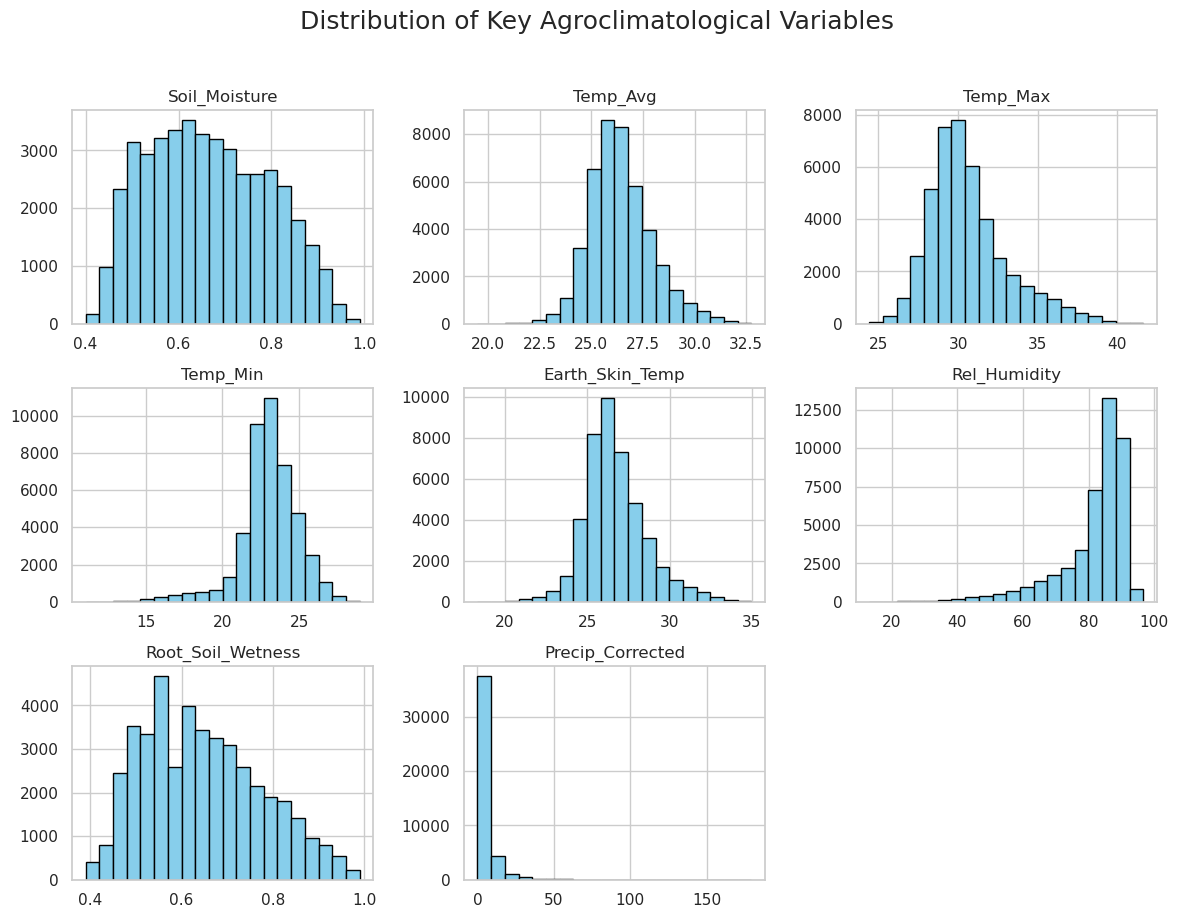

In [8]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

# Histograms of the key weather variables
df[['Soil_Moisture', 'Temp_Avg', 'Temp_Max', 'Temp_Min', 'Earth_Skin_Temp', 'Rel_Humidity', 'Root_Soil_Wetness', 'Precip_Corrected']].hist(bins=20, figsize=(14,10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Key Agroclimatological Variables", fontsize=18)
plt.show()

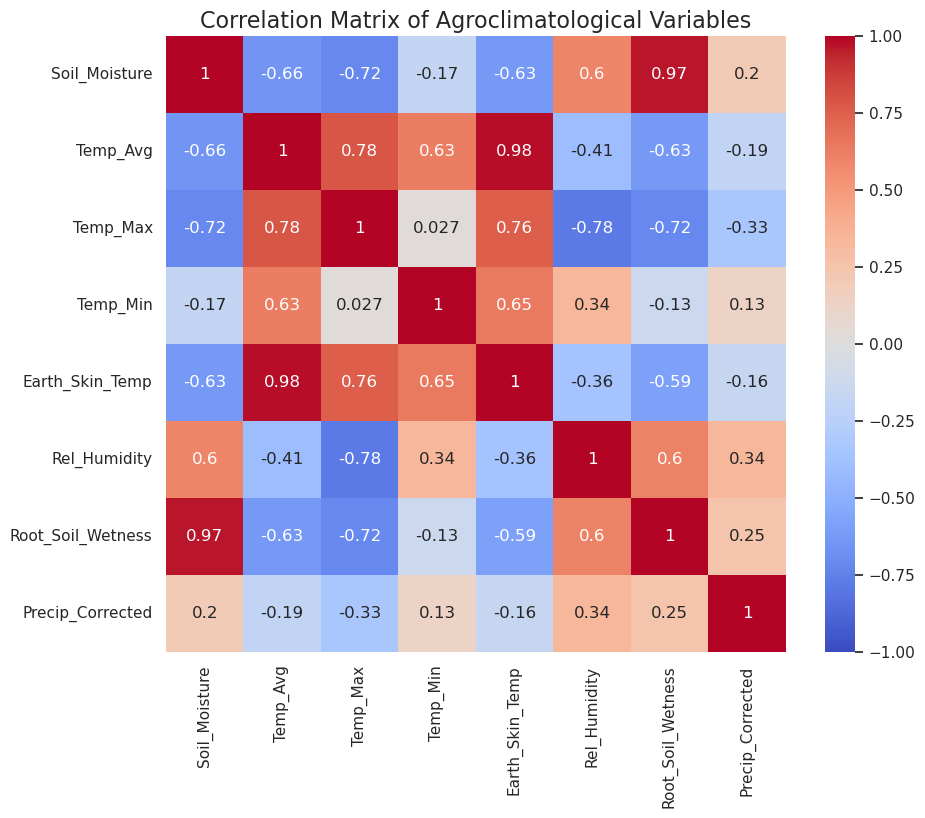

In [9]:
# Calculate correlation matrix
correlation_matrix = df[['Soil_Moisture', 'Temp_Avg', 'Temp_Max', 'Temp_Min', 'Earth_Skin_Temp', 'Rel_Humidity', 'Root_Soil_Wetness', 'Precip_Corrected']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Agroclimatological Variables", fontsize=16)
plt.show()

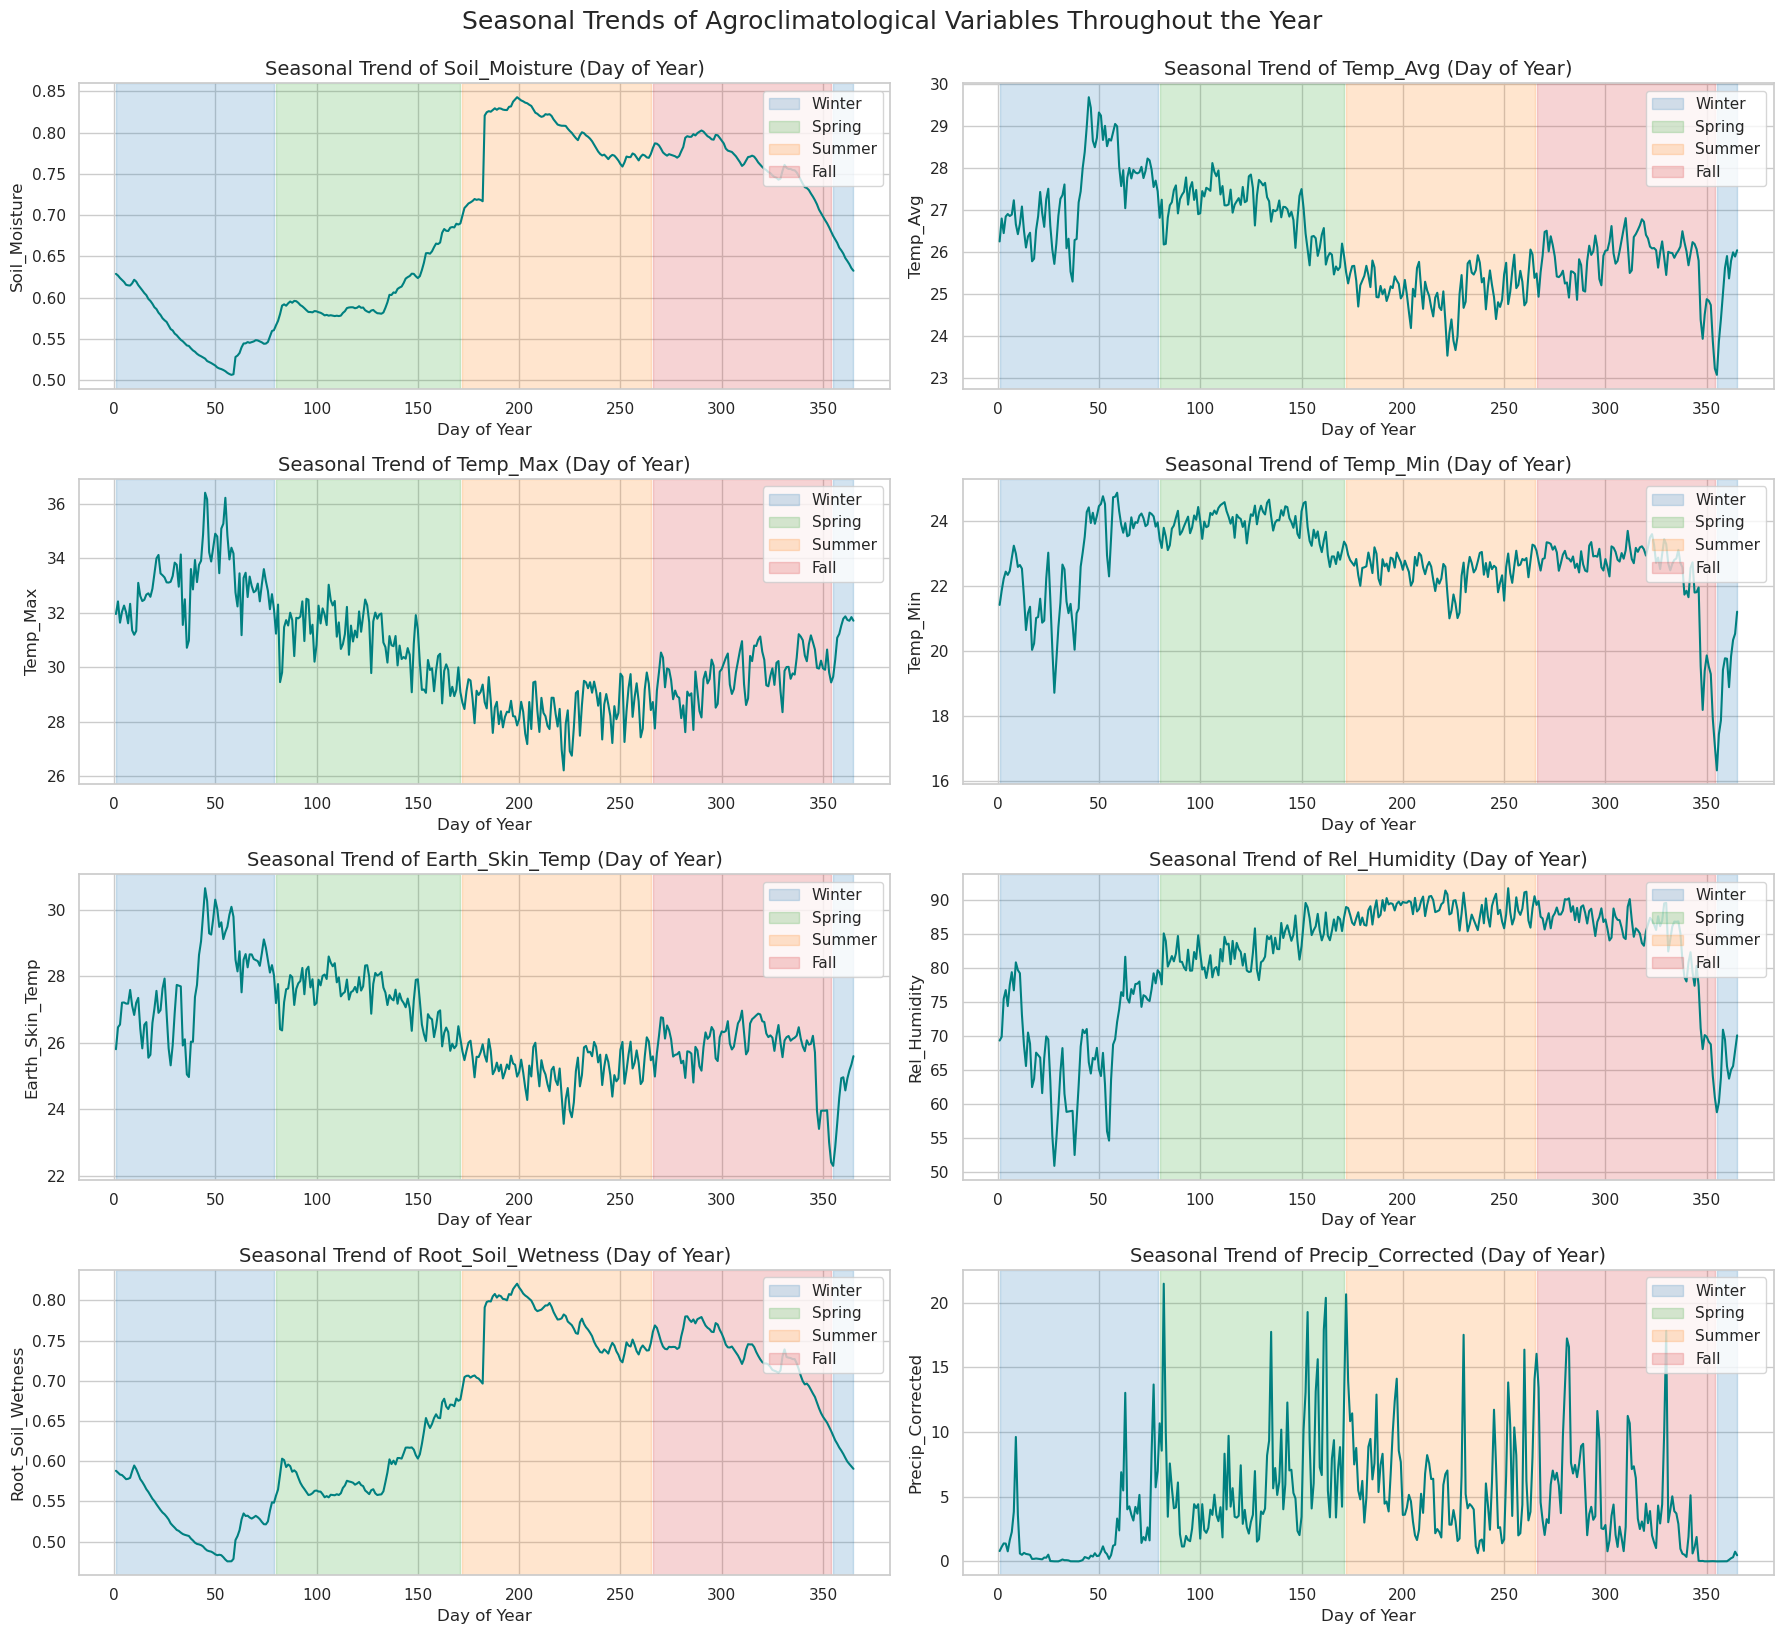

In [88]:
# Define the DOY ranges for each season
seasons = {
    'Winter': (355, 365),
    'Winter_Cont': (1, 79),  # Continues into the new year
    'Spring': (80, 171),
    'Summer': (172, 265),
    'Fall': (266, 354)
}

# Plot seasonal trends with seasonal highlights
plt.figure(figsize=(18, 16))

# Variables to examine by day of year
variables = ['Soil_Moisture', 'Temp_Avg', 'Temp_Max', 'Temp_Min', 'Earth_Skin_Temp', 'Rel_Humidity', 'Root_Soil_Wetness', 'Precip_Corrected']

# Higher contrast colors for each season
season_colors = {
    'Winter': '#1f77b4',   # Dark blue
    'Spring': '#2ca02c',   # Dark green
    'Summer': '#ff7f0e',   # Orange
    'Fall': '#d62728'      # Dark red
}

# Plot each variable
for i, var in enumerate(variables, 1):
    plt.subplot(4, 2, i)
    sns.lineplot(x=df['DATE'].dt.dayofyear, y=df[var], estimator='mean', errorbar=None, color="teal")
    plt.title(f"Seasonal Trend of {var} (Day of Year)", fontsize=14)
    plt.xlabel("Day of Year")
    plt.ylabel(var)
    
    # Highlight each season with higher contrast colors
    plt.axvspan(seasons['Winter'][0], seasons['Winter'][1], color=season_colors['Winter'], alpha=0.2, label="Winter")
    plt.axvspan(seasons['Winter_Cont'][0], seasons['Winter_Cont'][1], color=season_colors['Winter'], alpha=0.2)
    plt.axvspan(seasons['Spring'][0], seasons['Spring'][1], color=season_colors['Spring'], alpha=0.2, label="Spring")
    plt.axvspan(seasons['Summer'][0], seasons['Summer'][1], color=season_colors['Summer'], alpha=0.2, label="Summer")
    plt.axvspan(seasons['Fall'][0], seasons['Fall'][1], color=season_colors['Fall'], alpha=0.2, label="Fall")
    
    # Add legend to each subplot
    plt.legend(loc='upper right')

plt.tight_layout()
plt.suptitle("Seasonal Trends of Agroclimatological Variables Throughout the Year", fontsize=18, y=1.02)
plt.show()

In [11]:
# Create a new df where we assign stations to each LAT, LON
station_df = df.copy()
station_df['Station_ID'] = station_df.groupby(['LAT', 'LON']).ngroup()
column_order = ['Station_ID'] + [col for col in station_df.columns if col != 'Station_ID']
station_df = station_df[column_order]

station_df

,Station_ID,DATE,LAT,LON,Soil_Moisture,Temp_Avg,Temp_Max,Temp_Min,Earth_Skin_Temp,Rel_Humidity,Root_Soil_Wetness,Precip_Corrected
0,0,2023-03-01,4.75,-8.25,0.73,26.97,28.95,25.33,27.32,83.49,0.74,0.98
1,1,2023-03-01,4.75,-7.75,0.69,26.72,29.31,24.56,26.82,84.77,0.68,0.87
2,2,2023-03-01,4.75,-7.25,0.68,26.67,29.38,24.41,26.69,85.31,0.66,0.94
3,3,2023-03-01,4.75,-6.75,0.70,26.88,29.09,24.94,26.96,84.96,0.67,1.29
4,4,2023-03-01,4.75,-6.25,0.64,27.43,28.94,26.01,27.72,83.81,0.62,1.35
...,...,...,...,...,...,...,...,...,...,...,...,...
46843,85,2024-06-30,8.25,-4.75,0.55,25.62,28.88,22.98,25.78,85.20,0.55,6.88
46844,86,2024-06-30,8.25,-4.25,0.57,25.48,28.22,23.14,25.57,86.75,0.57,7.58
46845,87,2024-06-30,8.25,-3.75,0.58,25.47,28.37,23.33,25.63,86.88,0.59,8.29
46846,88,2024-06-30,8.25,-3.25,0.56,25.19,28.30,23.21,25.40,86.55,0.57,7.18


In [31]:
# Station 0
# Filter for rows with Station_ID 0 and explicitly make a copy
station_0 = station_df[station_df['Station_ID'] == 0].copy()

# Save the original index in the 'Master_Index' column using .loc
station_0.loc[:, 'Master_Index'] = station_0.index

# Reset the index if you want a new integer index
station_0.reset_index(drop=True, inplace=True)

# Chronologically order the data
station_0 = station_0.sort_values(by='DATE').reset_index(drop=True)

station_0

,Station_ID,DATE,LAT,LON,Soil_Moisture,Temp_Avg,Temp_Max,Temp_Min,Earth_Skin_Temp,Rel_Humidity,Root_Soil_Wetness,Precip_Corrected,Master_Index
0,0,2023-03-01,4.75,-8.25,0.73,26.97,28.95,25.33,27.32,83.49,0.74,0.98,0
1,0,2023-03-02,4.75,-8.25,0.73,26.83,28.87,25.24,27.23,86.06,0.74,6.34,96
2,0,2023-03-03,4.75,-8.25,0.73,26.86,29.27,25.10,27.40,86.53,0.75,5.15,192
3,0,2023-03-04,4.75,-8.25,0.73,26.59,28.49,25.19,27.34,87.50,0.75,5.24,288
4,0,2023-03-05,4.75,-8.25,0.73,27.03,29.65,24.96,27.79,83.30,0.75,1.91,384
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,0,2024-06-26,4.75,-8.25,0.73,25.12,26.32,24.31,25.81,88.13,0.75,3.53,46368
484,0,2024-06-27,4.75,-8.25,0.72,25.79,28.16,24.31,26.53,85.99,0.74,2.43,46464
485,0,2024-06-28,4.75,-8.25,0.72,25.51,27.70,24.21,26.24,86.38,0.74,2.98,46560
486,0,2024-06-29,4.75,-8.25,0.72,25.16,26.77,23.95,25.76,86.33,0.74,1.43,46656


In [32]:
# Contract_1 
contract_1 = pd.read_csv('Separation_1.csv', on_bad_lines='skip')

# Drop extra Date column
contract_1 = contract_1.drop(columns=['Date'])

# Chronologically order the data
contract_1 = contract_1[['DATE'] + [col for col in contract_1.columns if col != 'DATE']]

contract_1

,DATE,HIGH,LOW,OPEN,CLOSE,VOLUME
0,2023-06-01,3047.0,3002.0,3017.0,3008,34422.0
1,2023-06-02,3034.0,2991.0,3003.0,3026,25530.0
2,2023-06-05,3065.0,3002.0,3020.0,3056,28784.0
3,2023-06-06,3096.0,3040.0,3063.0,3045,52105.0
4,2023-06-07,3109.0,3028.0,3038.0,3103,43640.0
...,...,...,...,...,...,...
184,2024-02-26,6929.0,6650.0,6765.0,6884,42.0
185,2024-02-27,6893.0,6743.0,6780.0,6755,8.0
186,2024-02-28,6590.0,6362.0,6590.0,6380,7.0
187,2024-02-29,6466.0,6413.0,6413.0,6510,319.0


## Merging Agroclimatological Data & Comodity Data

In [41]:
# s0c1_df
# Ensure both DATE columns are in datetime format
station_0['DATE'] = pd.to_datetime(station_0['DATE'])
contract_1['DATE'] = pd.to_datetime(contract_1['DATE'])

# Inner join the Station_0 & Contract_1 by Date column 
s0c1_df = pd.merge(station_0, contract_1, on='DATE', how='inner')

s0c1_df

,Station_ID,DATE,LAT,LON,Soil_Moisture,Temp_Avg,Temp_Max,Temp_Min,Earth_Skin_Temp,Rel_Humidity,Root_Soil_Wetness,Precip_Corrected,Master_Index,HIGH,LOW,OPEN,CLOSE,VOLUME
0,0,2023-06-01,4.75,-8.25,0.88,26.76,28.34,25.47,27.05,89.02,0.91,28.56,8832,3047.0,3002.0,3017.0,3008,34422.0
1,0,2023-06-02,4.75,-8.25,0.90,26.00,27.77,24.67,26.67,89.16,0.93,36.92,8928,3034.0,2991.0,3003.0,3026,25530.0
2,0,2023-06-05,4.75,-8.25,0.93,26.34,28.25,25.09,26.89,88.59,0.94,27.75,9216,3065.0,3002.0,3020.0,3056,28784.0
3,0,2023-06-06,4.75,-8.25,0.95,26.09,28.00,24.82,26.69,90.15,0.97,48.35,9312,3096.0,3040.0,3063.0,3045,52105.0
4,0,2023-06-07,4.75,-8.25,0.96,25.70,27.60,24.37,26.48,90.12,0.97,46.25,9408,3109.0,3028.0,3038.0,3103,43640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,0,2024-02-26,4.75,-8.25,0.53,28.60,31.88,26.04,29.70,78.24,0.53,0.21,34752,6929.0,6650.0,6765.0,6884,42.0
185,0,2024-02-27,4.75,-8.25,0.53,28.68,32.13,26.33,29.70,79.23,0.53,0.33,34848,6893.0,6743.0,6780.0,6755,8.0
186,0,2024-02-28,4.75,-8.25,0.53,28.68,32.19,26.34,29.71,79.47,0.52,0.40,34944,6590.0,6362.0,6590.0,6380,7.0
187,0,2024-02-29,4.75,-8.25,0.53,28.26,31.37,26.29,29.03,81.22,0.52,0.44,35040,6466.0,6413.0,6413.0,6510,319.0


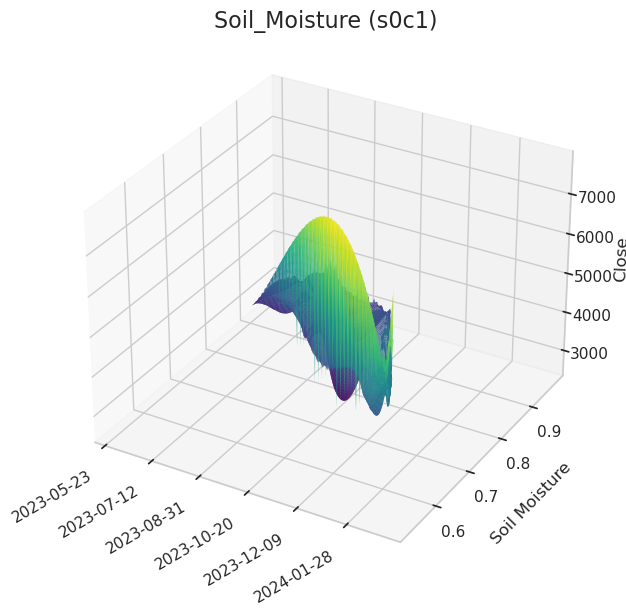

In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
import numpy as np
from scipy.interpolate import griddata

# Convert DATE to numeric format for plotting
s0c1_df['DATE'] = pd.to_datetime(s0c1_df['DATE'])
x = mdates.date2num(s0c1_df['DATE'])  # Convert dates to numeric format for plotting
y = s0c1_df['Soil_Moisture']
z = s0c1_df['CLOSE']

# Create a regular grid to interpolate the data
xi = np.linspace(x.min(), x.max(), 200)
yi = np.linspace(y.min(), y.max(), 200)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values on the grid
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none', rstride=1, cstride=1, antialiased=True)

# Set axis labels, removing the Date label and keeping Close
ax.set_xlabel('')  # Remove the Date label
ax.set_ylabel('Soil Moisture', fontsize=12, labelpad=10)
ax.set_zlabel('Close', fontsize=12, labelpad=3)

# Add title and subtitle, adjusting their positions
ax.set_title("Soil_Moisture (s0c1)", fontsize=16, pad=1)

# Format the x-axis to show dates more clearly
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()  # Rotate date labels for better readability

# Hide the color bar (heatmap legend)
cbar = fig.colorbar(surf, ax=ax, pad=0.1)
cbar.remove()

plt.show()


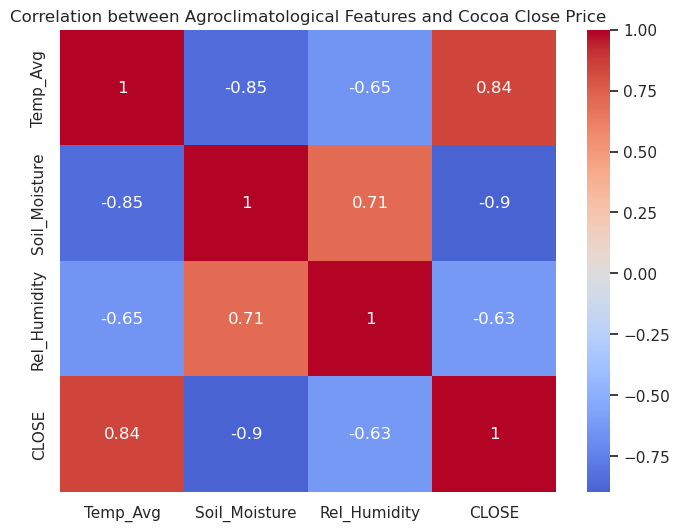

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant features and the close price
features = ['Temp_Avg', 'Soil_Moisture', 'Rel_Humidity', 'CLOSE']  # Add your relevant features
data = s0c1_df[features]

# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation between Agroclimatological Features and Cocoa Close Price")
plt.show()


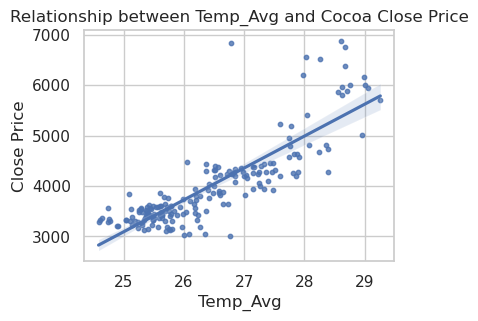

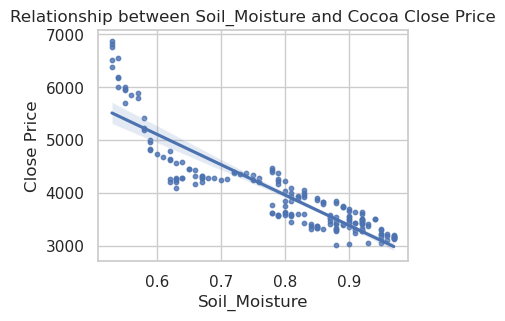

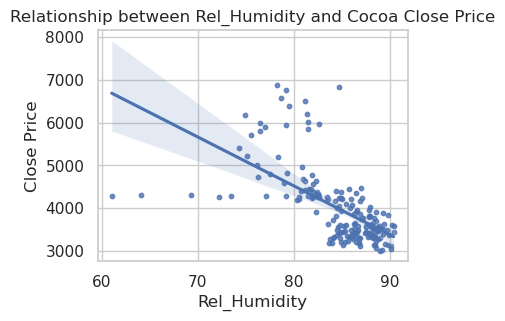

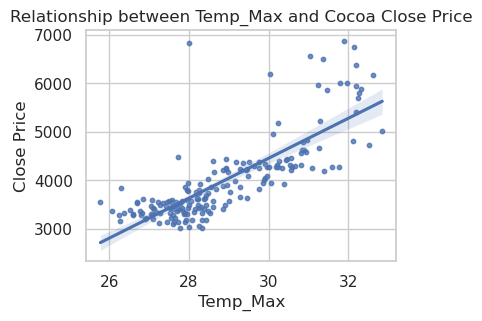

In [87]:
import seaborn as sns

features = ['Temp_Avg', 'Soil_Moisture', 'Rel_Humidity', 'Temp_Max', 'CLOSE'] 

for feature in features[:-1]:  # Exclude 'Close'
    plt.figure(figsize=(4, 3))
    sns.regplot(x=s0c1_df[feature], y=s0c1_df['CLOSE'], scatter_kws={'s':10})
    plt.title(f'Relationship between {feature} and Cocoa Close Price')
    plt.xlabel(feature)
    plt.ylabel('Close Price')
    plt.show()
